In [ ]:
# !pip install -q langchain langchain_community langchain_openai ultralytics supervision  flash_attn einops timm  accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 975.5/975.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 79.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.8/332.8 kB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.4/127.4 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.5/327.5 kB 39.

In [ ]:
from rich.pretty import pprint


def pretty_print(title: str = None, content: str = None):
    if title is None:
        print(content)
        return
    print(title)
    pprint(content)

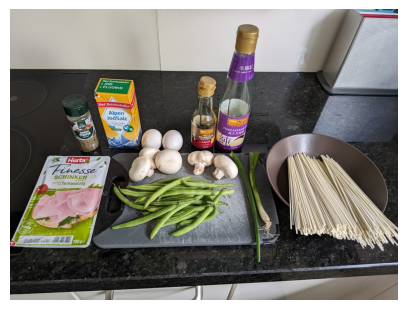

In [ ]:
import os
import matplotlib.pyplot as plt

if not os.path.exists("tmp"):
    os.mkdir("tmp")

image_path = "tmp/PXL_20240519_091911801.jpg"
import urllib.request

url = "https://dl.dropbox.com/scl/fi/fvpgpwzlqa8v3j6ntis2s/PXL_20240519_091911801.jpg?rlkey=vtc5dakept5jku8klknfaa150"
urllib.request.urlretrieve(url, image_path)

# no axis
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(plt.imread(image_path))

In [ ]:
annotated_image_1_path = "tmp/PXL_20240519_091911801_annotated_egg_bean.jpg"
classes=["bean", "egg"]

## Metrics definition

In [ ]:
class Metrics:
    gt: list[str]
    pred: list[str]

    def __init__(self, gt: list[str], pred: list[str]):
        self.gt = set(gt)
        self.pred = set(pred)

        self.gt = set([label.lower() for label in self.gt])
        self.pred = set([label.lower() for label in self.pred])

        pretty_print("Ground truth", self.gt)
        pretty_print("Prediction", self.pred)

    def accuracy(self) -> float:
        acc = len(self.pred.intersection(self.gt)) / len(self.gt)
        return round(acc, 3)

    @property
    def __str__(self) -> str:
        return f"Accuracy: {self.accuracy()}"

## Yolo8 World

In [ ]:
from ultralytics import YOLO
from ultralytics.engine.results import Boxes, Results


def yolo_annotate_image(
    img_path: str, classes: list[str] = list(), model_ckp: str = "yolov8s-world.pt"
) -> tuple[Results, Metrics]:
    """Annotate an image with classes (COCO dataset types)"""
    model = YOLO(model_ckp,  verbose=False)  # or select yolov8m/l-world.pt for different sizes

    if len(classes):
        model.set_classes(classes)

    preds = model.predict(img_path, show_labels=True, show_conf=False, device="0")
    results: Results = preds[0]
    cls = results.boxes.cls.cpu().numpy().tolist()
    cls = [int(c) for c in cls]
    label_names = results.names
    selected_names = [label_names[i] for i in cls]
    return results, Metrics(classes, selected_names)


image 1/1 /content/tmp/PXL_20240519_091911801.jpg: 480x640 3 eggs, 14.4ms
Speed: 2.7ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Ground truth


{'egg', 'bean'}

Prediction


{'egg'}

results


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'bean', 1: 'egg'}
obb: None
orig_img: array([[[178, 187, 191],
│   │   [178, 187, 191],
│   │   [178, 187, 191],
│   │   ...,
│   │   [ 17,  15,  15],
│   │   [ 14,  13,  15],
│   │   [ 11,  13,  14]],
│      
│      [[178, 187, 191],
│   │   [178, 187, 191],
│   │   [178, 187, 191],
│   │   ...,
│   │   [ 28,  26,  26],
│   │   [ 26,  25,  27],
│   │   [ 25,  27,  28]],
│      
│      [[178, 187, 191],
│   │   [178, 187, 191],
│   │   [178, 187, 191],
│   │   ...,
│   │   [ 21,  21,  21],
│   │   [ 22,  24,  24],
│   │   [ 26,  28,  28]],
│      
│      ...,
│      
│      [[154, 164, 164],
│   │   [155, 165, 165],
│   │   [157, 167, 167],
│   │   ...,
│   │   [114, 123, 136],
│   │   [114, 123, 136],
│   │   [114, 123, 136]],
│      
│      [[154, 164, 164],
│   │   [155, 165, 165],
│   │   [157, 167, 167],
│   │   ...,
│   │   [114, 123, 136],
│   │   [114, 123, 136],
│   │   [114, 123, 136]],
│      
│      [[154, 164, 164],
│   │   [155, 165, 165],
│   │   [157, 167, 167],
│   │   ...,
│   │   [114, 123, 136],
│   │   [114, 123, 136],
│   │   [114, 123, 136]]], dtype=uint8)
orig_shape: (932, 1243)
path: '/content/tmp/PXL_20240519_091911801.jpg'
probs: None
save_dir: 'runs/detect/predict'
speed: {'preprocess': 2.699613571166992, 'inference': 14.355897903442383, 'postprocess': 1.4829635620117188}

metrics


'Accuracy: 0.5'

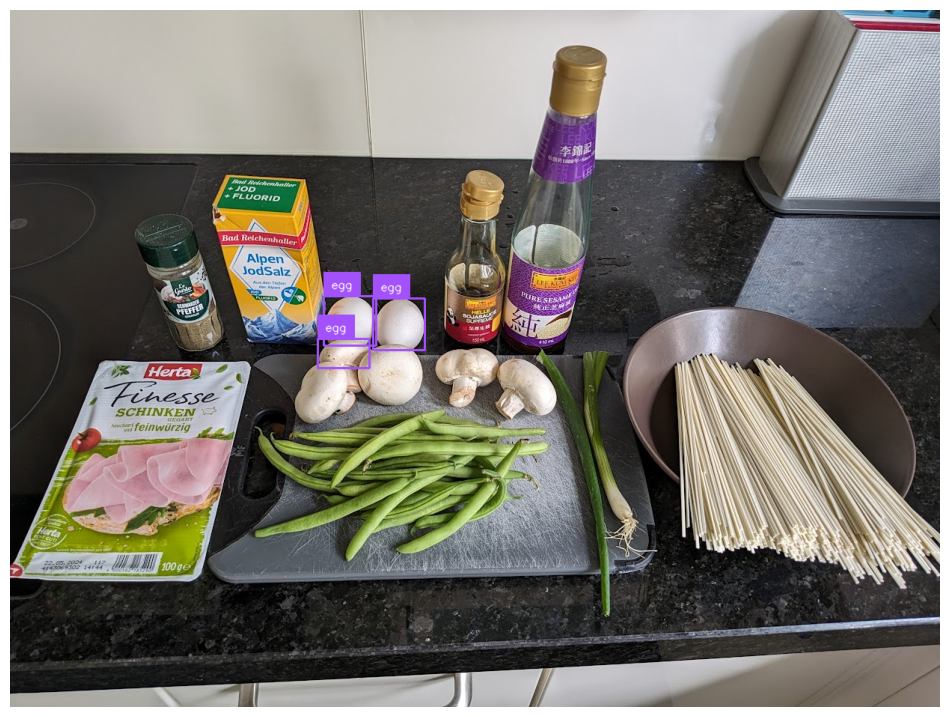

In [ ]:
import supervision as sv
from PIL import Image

res, metrics = yolo_annotate_image(classes=classes, img_path=image_path)
pretty_print("results", res)
pretty_print("metrics", metrics.__str__)
detections = sv.Detections.from_ultralytics(res)
bbox_annotator, label_annotator = sv.BoundingBoxAnnotator(
    color=sv.ColorPalette.ROBOFLOW
), sv.LabelAnnotator(color=sv.ColorPalette.ROBOFLOW)
annotated_image = label_annotator.annotate(
    bbox_annotator.annotate(
        Image.open(image_path),
        detections=detections,
    ),
    detections=detections
)
sv.plot_image(image=annotated_image)
annotated_image.save(annotated_image_1_path)

In [ ]:
#res, metrics = yolo_annotate_image(classes=classes, img_path=image_path)
#pretty_print("results", res)
#pretty_print("metrics", metrics.__str__)

#save_1 = res.save(annotated_image_1_path)
#plt.figure(figsize=(10, 10))
#plt.axis('off')
#plt.imshow(plt.imread(annotated_image_1_path))

## GroundingDINO

In [ ]:
def save(transformers_results, classes: list[str], image_path: str, save_path: str = None):
    res_labels = transformers_results["labels"]

    def label2id(res_labels: list[str]) -> np.ndarray:
        return np.array([res_labels.index(label) for label in res_labels])

    confidence = transformers_results["scores"].cpu().detach().numpy() if "scores" in transformers_results else np.array([1]*len(res_labels))
     # Check if either "boxes" or "bboxes" exists in transformers_results
    if "boxes" in transformers_results:
        xyxy = transformers_results["boxes"].cpu().detach().numpy()
    elif "bboxes" in transformers_results:
        xyxy = np.array(transformers_results["bboxes"])
    else:
        # Handle the case where neither key is present, perhaps by raising an error or returning
        raise ValueError("transformers_results does not contain 'boxes' or 'bboxes' key.")
    detections = sv.Detections(
        xyxy=xyxy,
        confidence=confidence,
        class_id=label2id(res_labels),
    )
    bbox_annotator, label_annotator = sv.BoundingBoxAnnotator(
        color=sv.ColorPalette.ROBOFLOW
    ), sv.LabelAnnotator(color=sv.ColorPalette.ROBOFLOW)
    annotated_image = label_annotator.annotate(
        bbox_annotator.annotate(
            Image.open(image_path),
            detections=detections,
            custom_color_lookup=sv.ColorLookup.CLASS,
        ),
        detections=detections,
        labels = res_labels,
        custom_color_lookup=sv.ColorLookup.CLASS,
    )
    if save_path is not None:
        annotated_image.save(save_path)
    else:
        sv.plot_image(image=annotated_image)

In [ ]:
import torch
from PIL import Image
from transformers import AutoModelForZeroShotObjectDetection, AutoProcessor

import numpy as np
import supervision as sv


def grounding_dino_annotation(
    img_path: str,
    classes: list[str] = None,
    box_threshold: float = 0.32,
    text_threshold: float = 0.32,
):
    image = Image.open(img_path)
    caption = ". ".join(classes) + "." if classes else ""
    model_id = "IDEA-Research/grounding-dino-base"
    device = "cuda" if torch.cuda.is_available() else "cpu"
    processor = AutoProcessor.from_pretrained(model_id)
    model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)
    inputs = processor(images=image, text=caption, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        results = processor.post_process_grounded_object_detection(
            outputs,
            inputs.input_ids,
            box_threshold=box_threshold,
            text_threshold=text_threshold,
            target_sizes=[image.size[::-1]],
        )
        ret = results[0]
        return ret, Metrics(classes, ret["labels"])


Ground truth


{'egg', 'bean'}

Prediction


{'egg', 'bean'}

transformers_results


{
│   'scores': tensor([0.5622, 0.5462, 0.5855], device='cuda:0'),
│   'labels': ['egg', 'egg', 'bean'],
│   'boxes': tensor([[487.8398, 385.8006, 554.0633, 453.2174],
│   │   [420.0776, 383.0943, 488.2356, 447.6725],
│   │   [327.7076, 532.7360, 720.4662, 737.7147]], device='cuda:0')
}

metrics


1.0

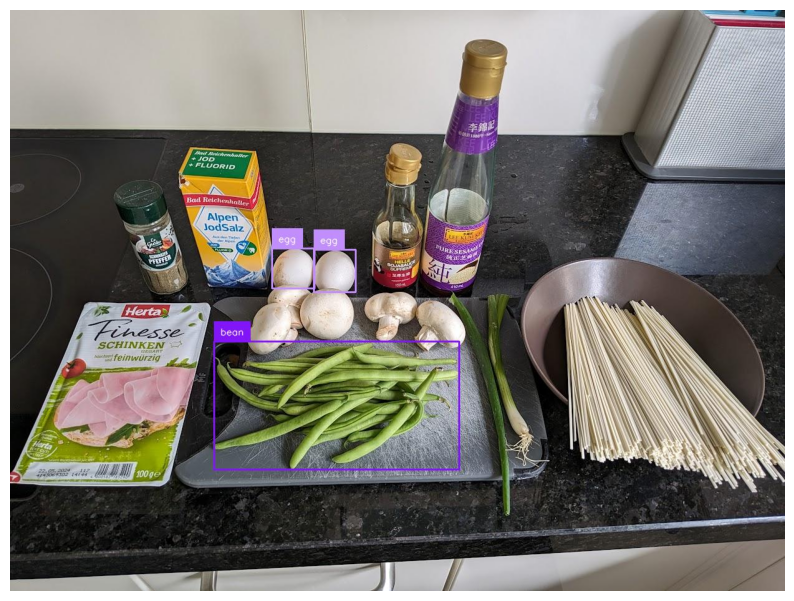

In [ ]:
transformers_results, metrics = grounding_dino_annotation(
    img_path=image_path, classes=classes
)
pretty_print("transformers_results", transformers_results)
pretty_print("metrics", metrics.accuracy())

save(transformers_results, classes, image_path, annotated_image_1_path)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(plt.imread(annotated_image_1_path))


## Florence 2

In [ ]:
from transformers import AutoModelForCausalLM, AutoProcessor
from typing import Literal

def florence2_annotation(img_path: str,
                         classes: list[str],
                         mode: str = Literal["base", "large"]):
    prompt = ",".join(classes)
    image = Image.open(img_path)
    model = AutoModelForCausalLM.from_pretrained(
        "microsoft/Florence-2-" + mode, trust_remote_code=True
    )
    processor = AutoProcessor.from_pretrained(
        "microsoft/Florence-2-" + mode, trust_remote_code=True
    )
    inputs = processor(text=prompt, images=image, return_tensors="pt")
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        do_sample=True,
        num_beams=3,
        #temperature=1e-9  # if do_sample = True
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    task = "<OD>"
    results = processor.post_process_generation(
        generated_text, task=task, image_size=(image.width, image.height)
    )
    ret = results[task]
    return ret, Metrics(classes, ret["labels"])

Ground truth


{'egg', 'bean'}

Prediction


{'egg'}

transformers_results


{
│   'bboxes': [
│   │   [487.87750244140625, 387.2460021972656, 554.99951171875, 455.281982421875],
│   │   [419.51251220703125, 384.4499816894531, 487.87750244140625, 449.69000244140625]
│   ],
│   'labels': ['egg', 'egg']
}

metrics


0.5

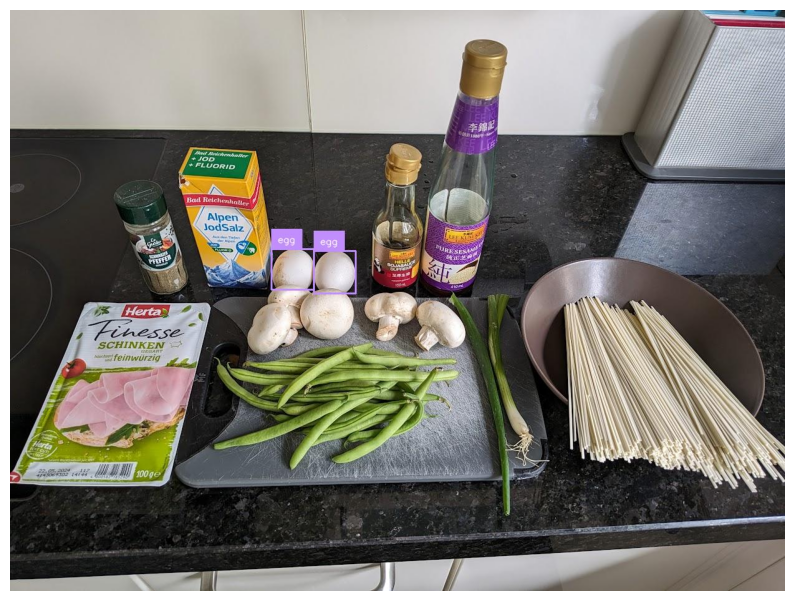

In [ ]:
transformers_results, metrics = florence2_annotation(
    img_path=image_path, classes=classes, mode="base"
)
pretty_print("transformers_results", transformers_results)
pretty_print("metrics", metrics.accuracy())

save(transformers_results, classes, image_path, annotated_image_1_path)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(plt.imread(annotated_image_1_path))

## Multi-modal LLM for image description

In [ ]:
import base64
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import HumanMessage
from google.colab import userdata

openai_key = userdata.get('OPENAI_API_KEY')
def image_detector(image_path: str, temperature: float = 0.0) -> str:
    """Detects objects in an image as much as possible and returns the description of the image."""
    with open(image_path, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode("utf-8")
        # pretty_print("base64_image", base64_image)

        chat = ChatOpenAI(model="gpt-4o", openai_api_key=openai_key, temperature=temperature, max_tokens=1024 * 2)
        res = chat.invoke(
            [
                HumanMessage(
                    content=[
                        {"type": "text", "text": "What is this image showing?"},
                        {
                            "type": "image_url",
                            "image_url": {
                                "url": f"data:image/jpeg;base64,{base64_image}",
                            },
                        },
                    ]
                )
            ]
        )

        return res.content

In [ ]:
image_description = image_detector(image_path, temperature=0.5)
pretty_print("image_description", image_description)

image_description


'The image shows a kitchen countertop with various ingredients and cooking items laid out, likely in preparation for a meal. The items include:\n\n1. A package of Herta Finesse Schinken (ham).\n2. A container of ground black pepper.\n3. A box of Alpen Jodsalz (iodized salt).\n4. Three eggs.\n5. Some white mushrooms.\n6. Fresh green beans.\n7. Green onions (scallions).\n8. A bottle of soy sauce.\n9. A bottle of pure sesame oil.\n10. A bowl of uncooked noodles.\n\nThese ingredients suggest preparation for a dish that might involve noodles, vegetables, and possibly a stir-fry or a similar recipe.'

In [ ]:
from langchain.prompts.chat import ChatPromptTemplate
from google.colab import userdata

openai_key = userdata.get('OPENAI_API_KEY')
def coco_label_extractor(img_desc: str) -> str:
    """Read an image description and extract COCO defined labels as much as possible from the description."""
    chat_template = ChatPromptTemplate.from_messages(
        [
            (
                "system",
                """You as an AI assistant can understand an image descritpion.
                 Attempt to primarily extract 3 to 15 COCO dataset specified labels from the description.
                 Only return lables and split by comma, no empty space between labels.""",
            ),
            ("human", "Image descritpion: {img_desc}"),
        ]
    )
    human_input = chat_template.format_messages(img_desc=img_desc)
    chat = ChatOpenAI(model="gpt-3.5-turbo", openai_api_key=openai_key, temperature=0, max_tokens=1024)
    return chat.invoke(human_input).content

## To COCO labels

In [ ]:
coco_labels = coco_label_extractor(image_description)
pretty_print("coco_labels", coco_labels)

coco_label_list = coco_labels.split(",")
coco_label_list = [label.strip().lower() for label in coco_label_list]
pretty_print("coco_label_list", coco_label_list)

coco_labels


'ham, pepper, salt, eggs, mushrooms, beans, onions, soy sauce, sesame oil, noodles'

coco_label_list


['ham', 'pepper', 'salt', 'eggs', 'mushrooms', 'beans', 'onions', 'soy sauce', 'sesame oil', 'noodles']

### Helper class for final output

### COCO on Yolo8 World

In [ ]:
class concated_image_result:
    res_img_path: str
    title: str
    description: str

    def __init__(self, res_img_path: str, title: str, description: str):
        self.res_img_path = res_img_path
        self.title = title
        self.description = description

concated_image_results = list[concated_image_result]()

def show_concated_image(concated_image_results: list[concated_image_result]):
    plt.figure(figsize=(20, 10))
    for i, res in enumerate(concated_image_results):
        axs = plt.subplot(1, len(concated_image_results), i + 1)
        axs.set_title(res.title)
        axs.axis("off")
        axs.text(
            0,
            -20,
            res.description,
            verticalalignment="top",
            horizontalalignment="left",
            fontsize=12,
            color="red",
        )

        plt.imshow(plt.imread(res.res_img_path))


image 1/1 /content/tmp/PXL_20240519_091911801.jpg: 480x640 1 eggs, 2 onionss, 14.7ms
Speed: 2.7ms preprocess, 14.7ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Ground truth


{'ham', 'beans', 'onions', 'mushrooms', 'eggs', 'noodles', 'sesame oil', 'pepper', 'soy sauce', 'salt'}

Prediction


{'onions', 'eggs'}

res


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'ham', 1: 'pepper', 2: 'salt', 3: 'eggs', 4: 'mushrooms', 5: 'beans', 6: 'onions', 7: 'soy sauce', 8: 'sesame oil', 9: 'noodles'}
obb: None
orig_img: array([[[178, 187, 191],
│   │   [178, 187, 191],
│   │   [178, 187, 191],
│   │   ...,
│   │   [ 17,  15,  15],
│   │   [ 14,  13,  15],
│   │   [ 11,  13,  14]],
│      
│      [[178, 187, 191],
│   │   [178, 187, 191],
│   │   [178, 187, 191],
│   │   ...,
│   │   [ 28,  26,  26],
│   │   [ 26,  25,  27],
│   │   [ 25,  27,  28]],
│      
│      [[178, 187, 191],
│   │   [178, 187, 191],
│   │   [178, 187, 191],
│   │   ...,
│   │   [ 21,  21,  21],
│   │   [ 22,  24,  24],
│   │   [ 26,  28,  28]],
│      
│      ...,
│      
│      [[154, 164, 164],
│   │   [155, 165, 165],
│   │   [157, 167, 167],
│   │   ...,
│   │   [114, 123, 136],
│   │   [114, 123, 136],
│   │   [114, 123, 136]],
│      
│      [[154, 164, 164],
│   │   [155, 165, 165],
│   │   [157, 167, 167],
│   │   ...,
│   │   [114, 123, 136],
│   │   [114, 123, 136],
│   │   [114, 123, 136]],
│      
│      [[154, 164, 164],
│   │   [155, 165, 165],
│   │   [157, 167, 167],
│   │   ...,
│   │   [114, 123, 136],
│   │   [114, 123, 136],
│   │   [114, 123, 136]]], dtype=uint8)
orig_shape: (932, 1243)
path: '/content/tmp/PXL_20240519_091911801.jpg'
probs: None
save_dir: 'runs/detect/predict'
speed: {'preprocess': 2.7065277099609375, 'inference': 14.732122421264648, 'postprocess': 1.2450218200683594}

bbox


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3., 6., 6.], device='cuda:0')
conf: tensor([0.3058, 0.2935, 0.2543], device='cuda:0')
data: tensor([[4.8609e+02, 3.8643e+02, 5.5437e+02, 4.5461e+02, 3.0577e-01, 3.0000e+00],
│   │   [4.1992e+02, 3.8360e+02, 4.8868e+02, 4.4828e+02, 2.9351e-01, 6.0000e+00],
│   │   [6.4964e+02, 4.6388e+02, 7.3236e+02, 5.4457e+02, 2.5435e-01, 6.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (932, 1243)
shape: torch.Size([3, 6])
xywh: tensor([[520.2265, 420.5224,  68.2773,  68.1749],
│   │   [454.2970, 415.9363,  68.7618,  64.6781],
│   │   [690.9976, 504.2258,  82.7200,  80.6891]], device='cuda:0')
xywhn: tensor([[0.4185, 0.4512, 0.0549, 0.0731],
│   │   [0.3655, 0.4463, 0.0553, 0.0694],
│   │   [0.5559, 0.5410, 0.0665, 0.0866]], device='cuda:0')
xyxy: tensor([[486.0879, 386.4350, 554.3652, 454.6099],
│   │   [419.9161, 383.5973, 488.6779, 448.2754],
│   │   [649.6376, 463.8813, 732.3576, 544.5704]], device='cuda:0')
xyxyn: tensor([[0.3911, 0.4146, 0.4460, 0.4878],
│   │   [0.3378, 0.4116, 0.3931, 0.4810],
│   │   [0.5226, 0.4977, 0.5892, 0.5843]], device='cuda:0')

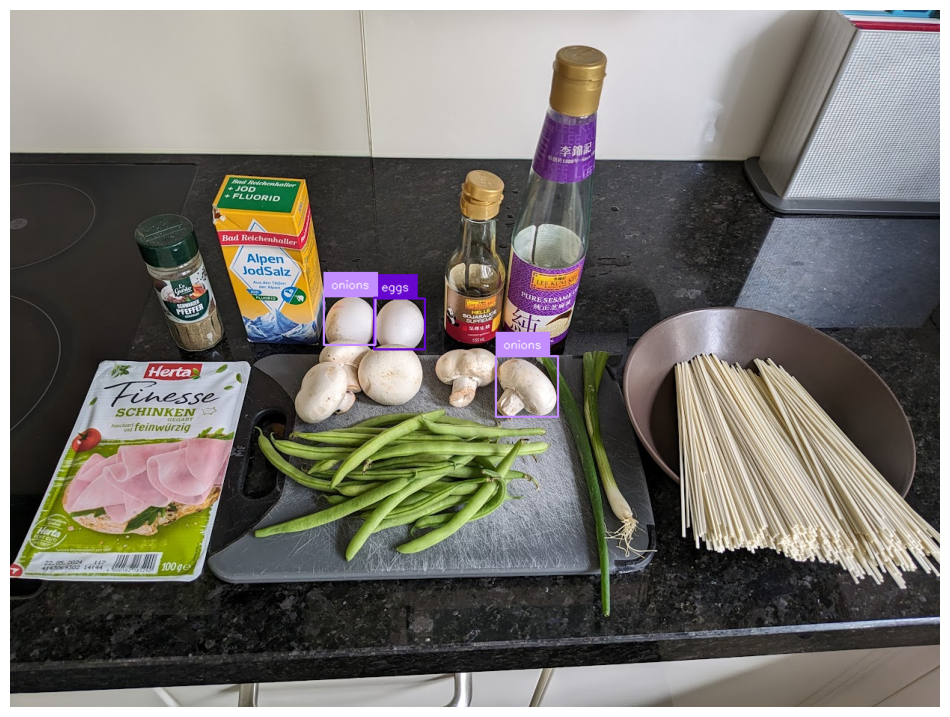

In [ ]:
yolo8world_final_path = "tmp/yolo8world_final_annotated.jpg"
res, metrics = yolo_annotate_image(classes=coco_label_list, img_path=image_path)
pretty_print("res", res)
pretty_print("bbox", res.boxes)
concated_image_results.append(
    concated_image_result(
        yolo8world_final_path, "YOLO8World + GPT ochstrated", metrics.__str__
    )
)

detections = sv.Detections.from_ultralytics(res)
bbox_annotator, label_annotator = sv.BoundingBoxAnnotator(
    color=sv.ColorPalette.ROBOFLOW
), sv.LabelAnnotator(color=sv.ColorPalette.ROBOFLOW)
annotated_image = label_annotator.annotate(
    bbox_annotator.annotate(
        Image.open(image_path),
        detections=detections,
    ),
    detections=detections
)
sv.plot_image(image=annotated_image)
annotated_image.save(yolo8world_final_path)


### Free of labels on Yolo8 World (self)


image 1/1 /content/tmp/PXL_20240519_091911801.jpg: 480x640 3 bottles, 1 bowl, 1 banana, 1 dining table, 14.3ms
Speed: 2.6ms preprocess, 14.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Ground truth


set()

Prediction


{'dining table', 'banana', 'bowl', 'bottle'}

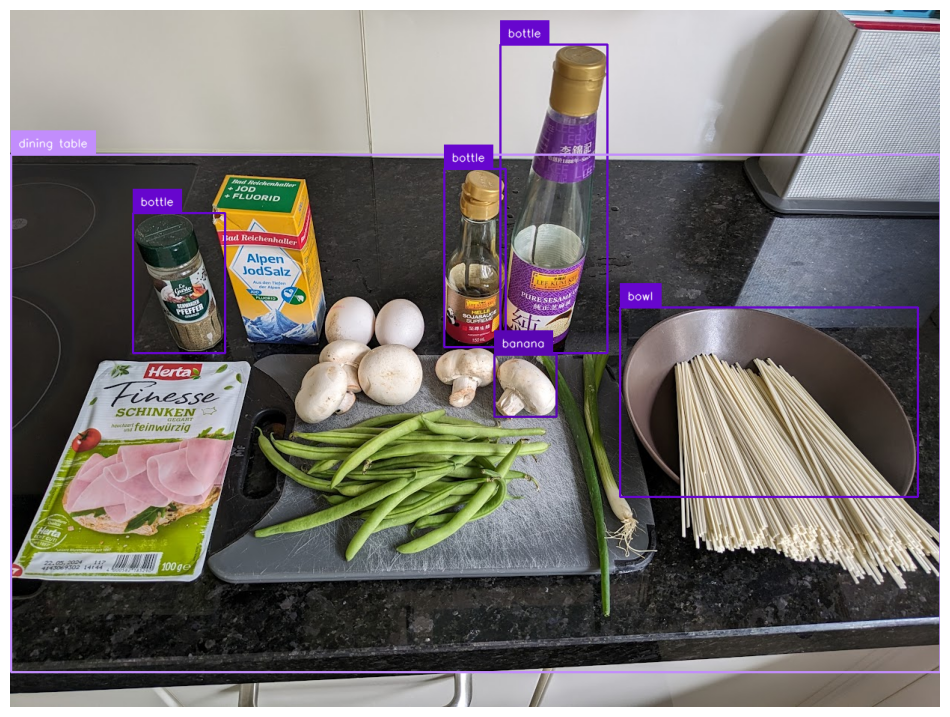

In [ ]:
yolo8world_self_final_path = "tmp/yolo8world_final_self_annotated.jpg"
res, _ = yolo_annotate_image(img_path=image_path)
concated_image_results.append(
    concated_image_result(
        yolo8world_self_final_path, "YOLO8World Self, no LLM ochstrated", ""
    )
)

detections = sv.Detections.from_ultralytics(res)
bbox_annotator, label_annotator = sv.BoundingBoxAnnotator(
    color=sv.ColorPalette.ROBOFLOW
), sv.LabelAnnotator(color=sv.ColorPalette.ROBOFLOW)
annotated_image = label_annotator.annotate(
    bbox_annotator.annotate(
        Image.open(image_path),
        detections=detections,
    ),
    detections=detections
)
sv.plot_image(image=annotated_image)
annotated_image.save(yolo8world_self_final_path)

### COCO on GroundingDINO

Ground truth


{'ham', 'beans', 'onions', 'mushrooms', 'eggs', 'noodles', 'sesame oil', 'pepper', 'soy sauce', 'salt'}

Prediction


{'beans', 'mushrooms', 'eggs', 'noodles', 'sesame oil', 'pepper'}

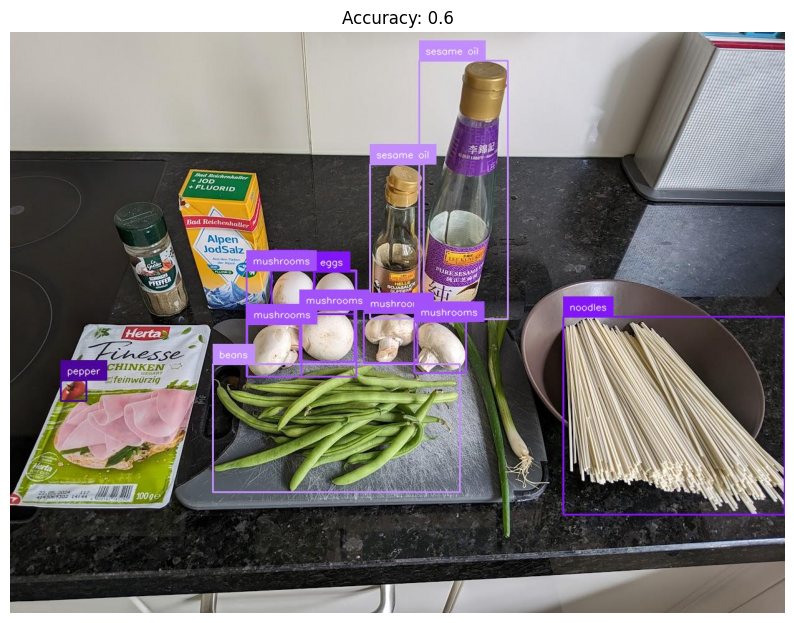

In [ ]:
groundingDINO_final_path = "tmp/groundingDINO_final_annotated.jpg"
transformers_results, metrics = grounding_dino_annotation(
    img_path=image_path, classes=coco_label_list
)
concated_image_results.append(
    concated_image_result(
        groundingDINO_final_path, "GroundingDINO + GPT ochstrated", metrics.__str__
    )
)
save(transformers_results, coco_label_list, image_path, groundingDINO_final_path)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title(metrics.__str__)
plt.imshow(plt.imread(groundingDINO_final_path))

### COCO on Florence 2

Ground truth


{'ham', 'beans', 'onions', 'mushrooms', 'eggs', 'noodles', 'sesame oil', 'pepper', 'soy sauce', 'salt'}

Prediction


{'beans', 'mushrooms', 'onions', 'pepper,salt,eggs', 'noodles', 'sesame oil', 'pepper', 'soy sauce'}

transformers_results


{
│   'bboxes': [
│   │   [83.90250396728516, 558.7340087890625, 123.67850494384766, 592.2860107421875],
│   │   [379.73651123046875, 383.51800537109375, 557.4855346679688, 553.1419677734375],
│   │   [379.73651123046875, 470.1940002441406, 469.2325134277344, 554.073974609375],
│   │   [465.5035095214844, 446.89398193359375, 554.99951171875, 529.8419799804688],
│   │   [649.467529296875, 465.53399658203125, 733.9915161132812, 547.5499877929688],
│   │   [568.6724853515625, 452.4859924316406, 655.6824951171875, 532.6380004882812],
│   │   [325.04449462890625, 534.5020141601562, 724.0475463867188, 737.677978515625],
│   │   [81.41650390625, 558.7340087890625, 124.92150115966797, 592.2860107421875],
│   │   [658.1685180664062, 47.06599807739258, 801.113525390625, 462.73797607421875],
│   │   [658.1685180664062, 47.99799728393555, 801.113525390625, 462.73797607421875],
│   │   [886.8804931640625, 458.0780029296875, 1241.135498046875, 774.0260009765625]
│   ],
│   'labels': [
│   │   'pepper',
│   │   'pepper,salt,eggs',
│   │   'mushrooms',
│   │   'mushrooms',
│   │   'mushrooms',
│   │   'mushrooms',
│   │   'beans',
│   │   'onions',
│   │   'soy sauce',
│   │   'sesame oil',
│   │   'noodles'
│   ]
}

metrics


0.6

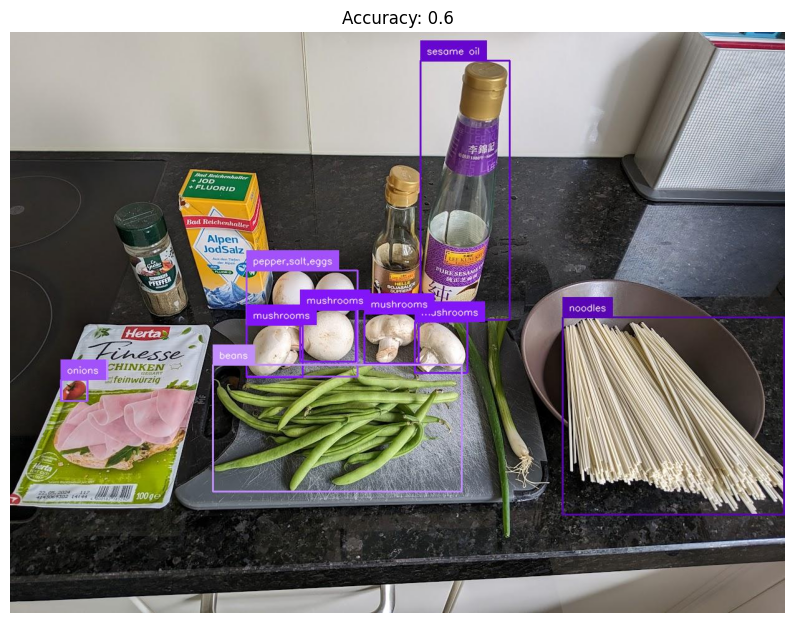

In [ ]:
florence2_final_path = "tmp/florence2_final_annotated.jpg"
transformers_results, metric = florence2_annotation(
    img_path=image_path, classes=coco_label_list, mode = "large"
)
pretty_print("transformers_results", transformers_results)
pretty_print("metrics", metrics.accuracy())
concated_image_results.append(
    concated_image_result(
        florence2_final_path, "Florence2 + GPT ochstrated", metrics.__str__
    )
)
save(transformers_results, coco_label_list, image_path, florence2_final_path)
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title(metrics.__str__)
plt.imshow(plt.imread(florence2_final_path))

## Show results on row

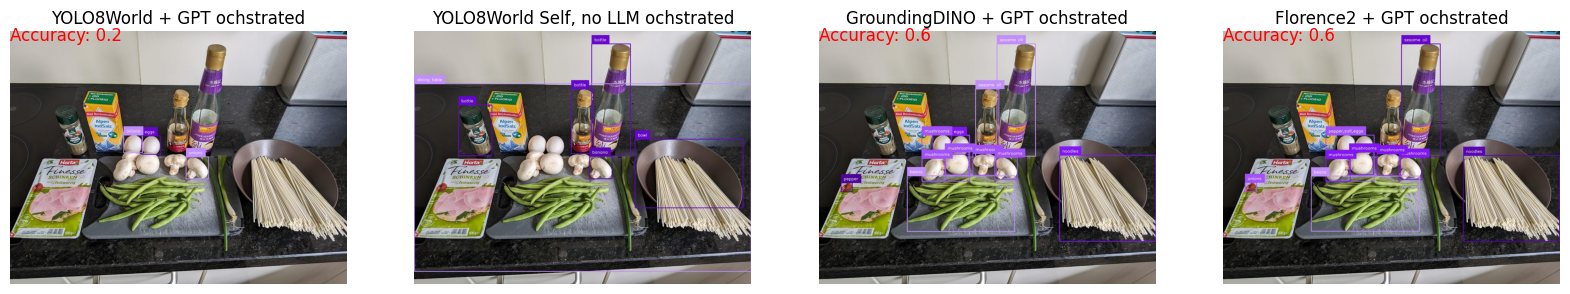

In [ ]:
show_concated_image(concated_image_results)